In [172]:
from math import exp
import random
random.seed(1)

# TODO: Calculate logistic
def logistic(x):
    s = 1 / (1 + exp(-x))
    return s

In [173]:
def test_logistic():
    assert abs(logistic(1) - 0.7310585786300049) < 1e-7
    assert abs(logistic(2) - 0.8807970779778823) < 1e-7
    assert abs(logistic(-1) - 0.2689414213699951) < 1e-7
test_logistic()
print('Pass: Logistic Function [5 points]')

Pass: Logistic Function [5 points]


In [174]:
# TODO: Calculate dot product of two lists
def dot(x, y):
    s = 0 # dot product over x and y
    for a, b in zip(x , y):
        s += a * b
    return s

In [175]:
def test_dot():
    d = dot([1.1,2,3.5], [-1,0.1,.08])
    assert abs(d - (-.62)) < 1e-7
test_dot()
print('Pass: Dot Product [10 points]')

Pass: Dot Product [10 points]


In [176]:
# TODO: Calculate prediction based on model
def predict(model, point):
    p = 0 # prediction value returned from logistic function
    product = dot(model, point['features'])
    p = logistic(product)
    return p

In [177]:
def test_predict():
    model = [1,2,1,0,1]
    point = {'features':[.4,1,3,.01,.1], 'label': 1}
    p = predict(model, point)
    assert abs(p - 0.995929862284) < 1e-7
test_predict()
print('Pass: Prediction [5 points]')

Pass: Prediction [5 points]


In [178]:
import csv
from sklearn.model_selection import train_test_split

def load_csv(filename):
    lines = []
    with open(filename) as csvfile:
        reader = csv.DictReader(csvfile)
        for line in reader:
            lines.append(line)
    return lines

def load_adult_data(fn):
    return load_csv(fn)

# Note: Possibly use different data for training and validation to get a more accurate result,
# but remember that in the last part your model will be trained on the full training data
# load_adult_data() and be tested on a test dataset you don't have access to.
def load_adult_train_data(fn):
    data = load_adult_data(fn)
    train, _ = train_test_split(data, test_size=0.10, random_state=0)
    return train

def load_adult_valid_data(fn):
    data = load_adult_data(fn)
    _, valid = train_test_split(data, test_size=0.10, random_state=0)
    return valid

In [179]:

fp_data = 'updated_removed.csv'
data = load_adult_train_data(fp_data)

In [180]:
print(len(data))
print(data[0])
print(len(data[0]))
print(data[0].keys())
print(data[0].values())

245
{'Gender': '1', 'Age': '31', 'Schooling': '12', 'Breastfeeding': '3', 'Varicella': '3', 'Initial_Symptom': '1', 'Mono_or_Polysymptomatic': '2', 'Oligoclonal_Bands': '1', 'LLSSEP': '1', 'ULSSEP': '0', 'VEP': '1', 'BAEP': '0', 'Periventricular_MRI': '1', 'Cortical_MRI': '1', 'Infratentorial_MRI': '0', 'Spinal_Cord_MRI': '0', 'group': '2'}
17
dict_keys(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group'])
dict_values(['1', '31', '12', '3', '3', '1', '2', '1', '1', '0', '1', '0', '1', '1', '0', '0', '2'])


In [181]:
def accuracy(data, predictions):
    # TODO: Calculate accuracy of predictions on data
    correct = 0
    for point, pred in zip(data, predictions):
        if pred >= 0.5:
            predicted_label = 1
        else:
            predicted_label = 0

        if predicted_label == point['label']:
            correct += 1
    return float(correct) / len(data)

In [182]:
def extract_features(raw):
    data = []
    for r in raw:
        point = {}
        point["label"] = (r['group'] == '1')

        features = []
        features.append(float(r['LLSSEP'])/10)
        features.append(float(r['Periventricular_MRI']) == 1)
        features.append(float(r['Age']) / 100)

        if 'Initial_Symptom' in r and r['Initial_Symptom'].strip() != '':
            features.append(float(r['Initial_Symptom']) / 10.0)
        else:
            features.append(0.0)     

        point['features'] = features
        data.append(point)
    return data

In [183]:
def test_accuracy(fn):
    load_data = load_adult_train_data(fn)
    data = extract_features(load_data)
    a = accuracy(data, [0]*len(data))
test_accuracy(fp_data)
print('Pass: Accuracy [10 points]')

Pass: Accuracy [10 points]


In [184]:
def initialize_model(k):
    return [random.gauss(0, 1) for x in range(k)]

# TODO: Train model using training data
def train(data, epochs, rate, lam):
    model = initialize_model(len(data[0]['features']))
    for x in range(epochs):
        for N in data:
            pred = predict(model, N)
            error = N['label'] - pred
            for i in range(len(model)):
                model[i] = model[i] - (rate * lam * model[i]) + (rate * N['features'][i] * error)
    return model

In [185]:
# TODO: Tune your parameters for final submission
def submission(data):
    random.seed(1)
    return train(data, 40, 1e-3, 1e-1)

    # return train(data, 40, 1e-4, 1e-3)

In [186]:
import matplotlib.pyplot as plt
def test_submission(fn):
    train_data = extract_features(load_adult_train_data(fn))
    valid_data = extract_features(load_adult_valid_data(fn))
    model = submission(train_data)
    predictions = [predict(model, p) for p in train_data]
    print("Training Accuracy:", accuracy(train_data, predictions))
    predictions = [predict(model, p) for p in valid_data]
    print("Validation Accuracy:", accuracy(valid_data, predictions))
test_submission(fp_data)

Training Accuracy: 0.7591836734693878
Validation Accuracy: 0.8214285714285714


Fold scores: [0.82608696 0.82608696 0.76086957 0.84444444 0.82222222 0.84444444]
Average accuracy: 0.8206924315619967


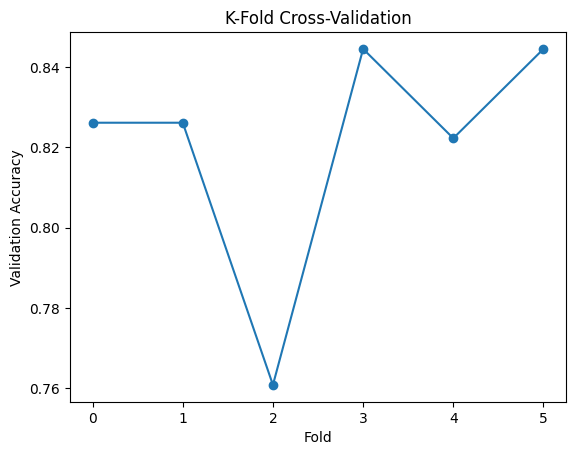

In [187]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# import matplotlib.pyplot as plt

df = pd.read_csv("initial_cleaned.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Pipeline: impute NaN → SVC
model = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("svc", SVC(kernel="linear", C=1))
])

kf = KFold(n_splits=6, shuffle=True, random_state=0)

scores = cross_val_score(model, X, y, cv=kf)

print("Fold scores:", scores)
print("Average accuracy:", scores.mean())
plt.plot(scores, marker='o')
plt.title('K-Fold Cross-Validation')
plt.ylabel('Validation Accuracy')
plt.xlabel('Fold')
plt.xticks(range(len(scores)))  
plt.show()


